In [1]:
%matplotlib inline

# Classification

반응변수가 질적 변수인 경우들이 많이 있다.

질적 변수들의 예:

\begin{align*}
&\textrm{eye color} \in \{ \textrm{brown}, \textrm{blue}, \textrm{green} \}  \\
&\textrm{email} \in \{\textrm{spam}, \textrm{ham} \} 
\end{align*}

질적 반응변수를 예측하는 분류 (classfication)에 대해 알아보자. 크게 두 가지 방법이 있다.

* 주어진 입력 변수 $X$에 대해 클래스를 결정하는 함수 $C(X)$를 찾는 방법  
* 입력 변수 $X$가 특정 클래스들에 속하는 확률들을 구하는 방법

질적 반응 변수가 두 개의 클래스로 이루어진 경우 선형회귀 방법 또한 잘 작동한다. 

이 경우, 하나의 클래스에 대한 $Y$값을 0으로, 다른 클래스에 대한 $Y$값을 1로 설정하여 선형회귀를 진행한다.

이렇게 하는 것은 나중에 살펴볼 linear discriminat analysis 방법과 동치라고 알려져 있다.

하지만, 클래스의 숫자가 늘어나면 선형회귀 방법은 적용하기 어렵다. 

예를 들어, 응급실에 환자가 도착한 경우, 증상에 따른 분류를 다음의 숫자들로 치환하여 선형회귀를 진행하는 경우를 가정해 보자.

$$
    Y = 
\begin{cases}
    1, & \text{if stroke;} \\
    2, & \text{if drug overdose;} \\
    3, & \text{if epileptic seizure.}
\end{cases}
$$

하지만, 위 코딩은 $Y$에 순서 구조와 거리 구조를 강제하며, 이는 질적 변수의 특징이 아니다.

따라서 분류를 위해 특별히 고안된 방법들을 사용하는 것이 좋겠다.

## Logistic regression

balance라는 입력 변수를 이용하여 default의 여부를 예측하는 문제를 생각해 보자. Default에 대한 반응변수 $Y$는 다음과 같이 코딩한다.

$$
    Y = 
\begin{cases}
    0, & \text{if No;} \\
    1, & \text{if Yes.} 
\end{cases}
$$

주어진 $X$에 대해 default가 발생할 확률을 다음과 같이 표현하자.

$$ p(X) = \mathbb P (Y = 1 | X)$$

따라서,

$$ 1 - p(X) = \mathbb P (Y = 0 | X)$$

Logistic regression에서는 다음의 식을 가정한다.

$$ p(X) = \frac{e^{\theta_0 + \theta_1 X}}{1 + e^{\theta_0 + \theta_1 X}} $$

위와 같이 가정하면 $\theta$나 $X$의 값에 상관없이 $p(X)$는 항상 0과 1 사이의 값을 취한다.

또한, 위 식은 다음으로도 표현되며, 이 값은 $p(X)$의 log odds 혹은 logit transformation이라고도 불리운다.

$$ \log \left( \frac{p(X)}{1 - p(X)}\right)  = \theta_0 + \theta_1 X $$

### Maximum likelihood method

위 확률모형의 $\theta$들을 추정하기 위한 전통적인 방법으로 maximum likelihood estimation (MLE)가 있다.

관찰값 $\{x_i, y_i \}$들이 주어졌을 때, logistic regression의 모수 $\theta_0, \theta_1$을 추정하기 위해, likelihood 함수를 정의하자.

$$ \ell (\theta_0, \theta_1) = \prod_{i:y_i=1} p(x_i) \prod_{i:y_i=0}(1-p(x_i)) $$

여기서 

$$p(x_i) = p_i = \frac{e^{\theta_0 + \theta_1 x_i}}{1 + e^{\theta_0 + \theta_1 x_i}} = \frac{1}{1 + e^{-\theta_0 - \theta_1 x_i}} $$ 

이므로 위 식의 우변은 $\theta_0, \theta_1$의 함수이다.

추정량 $\hat \theta_0, \hat \theta_1$은 $\ell (\theta_0, \theta_1)$를 최대화하는 값들로 다음으로 표현된다.

$$ \hat \theta_0, \hat \theta_1 = \arg \max_{\theta_0, \theta_1} \ell (\theta_0, \theta_1) $$

이는 log-likelihood 함수를 최대화하는 것과 동치이다.

$$ \hat \theta_0, \hat \theta_1 = \arg \max_{\theta_0, \theta_1} \log \ell (\theta_0, \theta_1) = \arg \max_{\theta_0, \theta_1}  \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i)\log(1- p_i) \right]$$

$\hat \theta_0, \hat \theta_1$의 추정치가 결정되면 이를 이용하여 주어진 $X$에 대해 default 확률을 추정할 수 있다.

$$ \hat p(X) = \frac{e^{\hat \theta_0 + \hat \theta_1 X}}{1 + e^{\hat \theta_0 + \hat \theta_1 X}} $$

## 여러 입력변수로 확장

로지스틱 회귀는 자연스럽게 여러 입력변수를 가지는 모형으로도 확장 가능하다.

$$ \log \left( \frac{p(X)}{1 - p(X)}\right)  = \theta_0 + \theta_1 X_1 + \cdots + \theta_p X_p  $$

혹은,

$$ p(X) = \frac{e^{\theta_0 + \theta_1 X_1 + \cdots + \theta_p X_p}}{1 + e^{\theta_0 + \theta_1 X_1 + \cdots + \theta_p X_p}} $$


## 로지스틱 회귀의 gradient vector

앞서 공부한 경사하강법은 로지스틱 회귀방법에도 적용 가능하다.

### 비용함수

훈련 샘플 하나에 대한 손실 함수를 다음으로 두자.

$$ c(\boldsymbol{\theta}) = \left\{\begin{array}{lr}
        -\log(p), & \text{if } y = 1\\
        -\log(1 - p), & \text{if } y = 0\\
        \end{array}\right.
$$

이를 전체 샘플에 평균으로 적용하여 확장하면, 비용함수는 결국 음의 log-likelihood 함수로

$$ J(\boldsymbol{\theta}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i)\log(1- p_i) \right]$$
이며, 여기서
$$ \ p_i = \sigma(\boldsymbol{\theta} \cdot x_i) = \frac{1}{1 + \exp( - \boldsymbol{\theta} \cdot x_i)} = \frac{1}{1 + \exp( - \theta_0 - x_{i1} \theta_1 - \cdots -  x_{ip} \theta_p )}. $$

### Gradient vector

다음에 대해
$$ \sigma(t) = \frac{1}{1 + \exp(-t)} $$
미분은
$$ \frac{d}{d t}\sigma(t) = \sigma(t) (1 - \sigma(t))$$
와 같이 주어지므로, 비용함수의 편미분을 다음과 같이 계산할 수 있다.

\begin{align*}
\frac{\partial }{\partial \theta_j} J(\theta) &= -\frac{1}{N} \sum_{i=1}^{N} 
\left[ y_i  \frac{ \frac{\partial }{\partial \theta_j} \sigma(\theta \cdot x_i)}{\sigma(\theta \cdot x_i)} + (1 - y_i)  \frac{ \frac{\partial }{\partial \theta_j} \left\{ 1 - \sigma(\theta \cdot x_i) \right\} }{1 - \sigma(\theta \cdot x_i)} \right]\\
&= -\frac{1}{N} \sum_{i=1}^{N} 
\left[ y_i  \frac{\sigma(\theta \cdot x_i)(1 - \sigma(\theta \cdot x_i)) }{\sigma(\theta \cdot x_i)}x_{ij} + (1 - y_i)  \frac{ \sigma(\theta \cdot x_i)(1 - \sigma(\theta \cdot x_i)) } {1 - \sigma(\theta \cdot x_i)}x_{ij} \right] \\
&= - \frac{1}{N}  \sum_{i=1}^{N} \left[ y_i - \sigma(\theta \cdot x_i) y_i - \sigma(\theta \cdot x_i) + \sigma(\theta \cdot x_i) y_i \right] x_{ij} \\
& = \frac{1}{N}  \sum_{i=1}^{N} \left[ \sigma(\theta \cdot x_i) - y_i\right] x_{ij} \\
& = \frac{1}{N}  \mathbf x_j^{\top} ( \sigma(\mathbf X \theta) - \mathbf y).
\end{align*}

따라서 비용함수의 gradient vector는
\begin{equation*}
\nabla_\theta J (\theta) =  \frac{1}{N} \mathbf X^{\top} ( \sigma(\mathbf X \theta) - \mathbf y) = \frac{1}{N} \mathbf X^{\top} \left( \frac{1}{1 + \exp(- \mathbf X \theta)} - \mathbf y \right)
\end{equation*}
이고,

현재의 $\boldsymbol{\theta}$에서 다음 스텝에서의 $\boldsymbol{\theta}^{\text{(next step)}}$는 다음과 같다.

$$ \boldsymbol{\theta}^{\text{(next step)}} = \boldsymbol{\theta} - \eta \nabla_\theta J (\theta) $$

물론 logistic regression을 진행하기 위해 매번 gradient를 계산하는 코드를 직접 작성할 필요는 없다.  
```sklearn.linear_model.LogisticRegression```을 이용하여 예제를 진행해 본다.

### Iris dataset example

[Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
import pandas as pd
pd.DataFrame(iris["data"], columns=iris["feature_names"])

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

먼저 $X =$ petal width이며, 이 때 붓꽃의 품종이 virginica인가 아닌가를 판단하는 예제를 진행해 보자.  

In [7]:
import numpy as np
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int)  # virginica인가, 아닌가로 구분
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
pd.DataFrame(np.c_[X, y], columns=("petal width", "virginica"))

petal width  virginica
0            0.2        0.0
1            0.2        0.0
2            0.2        0.0
3            0.2        0.0
4            0.2        0.0
..           ...        ...
145          2.3        1.0
146          1.9        1.0
147          2.0        1.0
148          2.3        1.0
149          1.8        1.0

[150 rows x 2 columns]

진행하기에 앞서 앞 단원에서 했던 것처럼, 직접 gradient를 이용하여 $\theta$를 추정해 보자.

In [9]:
Xb = np.c_[np.ones((X.shape[0], 1)), X]

eta = 0.05
n_iteration = 20000
N = len(y)

theta = np.array([[0],[0]])
evolution = np.ravel(theta)

for _ in range(n_iteration):
    grad = 1 / N * Xb.T @ ( 1 / (1 + np.exp(-Xb @ theta)) - y.reshape(-1,1))
    # update theta
    theta = theta - eta * grad
    evolution = np.vstack((evolution, np.ravel(theta)))

theta

array([[-12.36961123],
       [  7.56309795]])

In [10]:
# 새로운 테스트 값에 대해 확률 예측
xtest = 2
np.exp(theta[0,0] + theta[1,0] * xtest) / (1 + np.exp(theta[0,0] + theta[1,0] * xtest))

0.9402841518512881

log-likelihood 함수가 어떻게 생겼는지 살펴보자.  

아래 그림에 따르면, 이 문제는 추정이 잘 되는 케이스는 아니다.

In [11]:
def llf(theta, X, y):
    llh = 0
    for i in range(X.shape[0]):
        p = 1 / (1 + np.exp(-  X[i,:] @ theta))
        llh += y[i] * np.log(p) + (1 - y[i]) * np.log(1 - p)
    return llh               

In [12]:
theta1 = np.linspace(-30, 0, 100)
theta2 = np.linspace(0, 14, 100)
Theta1, Theta2 = np.meshgrid(theta1, theta2)

Z = np.zeros_like(Theta1)

for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = -llf([Theta1[i,j], Theta2[i,j]], Xb, y)

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl

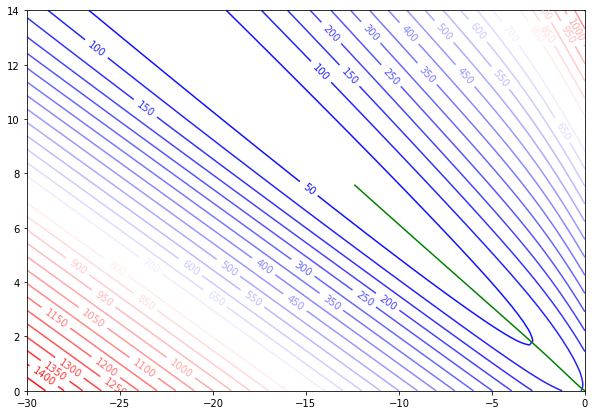

In [14]:
fig = plt.figure(figsize = (10,7))

#contour plot for LLF

contours = plt.contour(Theta1, Theta2, Z, 
                       levels = 30, 
                       cmap=mpl.cm.bwr)
plt.clabel(contours, inline = True, fontsize = 10)
plt.plot(evolution[:,0], evolution[:,1], color='green')

plt.show()

### ```sklearn.linear_model.LogisticRegression```

[sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


```LogisticRegression()``` : 생성자

* ```fit()``` : 모델 훈련

* ```predict_proba()``` : 확률 추정

* ```predict()``` : class label 추정

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg 

LogisticRegression()

In [16]:
log_reg.fit(X, y)

LogisticRegression()

In [17]:
log_reg.intercept_, log_reg.coef_

(array([-7.1947083]), array([[4.3330846]]))

어떤 numerical solver를 사용하냐에 따라 추정치가 달라질 수 있다.  

전의 그림에도 보았듯이 likelihood의 global maximum이 명확하지 않아 발생하는 문제이다.

In [18]:
log_reg_liblinear = LogisticRegression(solver = 'liblinear').fit(X, y)
log_reg_liblinear.intercept_, log_reg_liblinear.coef_

(array([-4.22209186]), array([[2.61789264]]))

```predict_proba()```를 이용하여, 새로운 $x$값들에 대해 virginica에 속할 확률을 계산하기.

반환값은 각 클래스에 속할 확률을 순서대로 나열한다.

내부적으로는 모수 추정치와 $p = 1 / (1 + e^{-\hat \theta \cdot x_i})$의 공식을 이용한다.  

In [19]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # -1 stands for unknown dimension
y_proba = log_reg.predict_proba(X_new)

In [20]:
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

Virginica일 확률과 그렇지 않을 확률을 비교하여, 관찰된 ```petal_width```로 해당 붓꽃이 virginica 품종에 속할지 예측한다.

```predict()``` method를 이용할 수도 있다.  

In [21]:
class_prediction = log_reg.predict(X_new)

In [22]:
df = pd.DataFrame(np.c_[X_new, y_proba, class_prediction], columns = ("petal_width",  "p(not virginica)", "p(virginica)", "class"))
df.sample(n = 10).sort_values("petal_width")

petal_width  p(not virginica)  p(virginica)  class
16      0.048048          0.999077      0.000923    0.0
180     0.540541          0.992252      0.007748    0.0
215     0.645646          0.987836      0.012164    0.0
260     0.780781          0.978364      0.021636    0.0
389     1.168168          0.894063      0.105937    0.0
398     1.195195          0.882449      0.117551    0.0
550     1.651652          0.509489      0.490511    0.0
759     2.279279          0.064068      0.935932    1.0
914     2.744745          0.009027      0.990973    1.0
986     2.960961          0.003557      0.996443    1.0

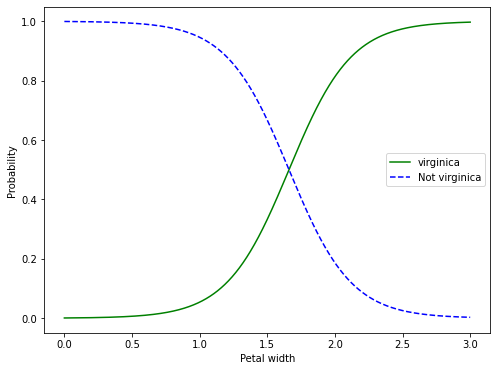

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(X_new, y_proba[:, 1], "g-", label = "virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Not virginica")
plt.legend()
plt.xlabel("Petal width")
plt.ylabel("Probability")
plt.show()

### Petal length와 Petal width에 따른 분류

$X$가 여러 개 있는 경우로도 쉽게 확장할 수 있다.  

Petal length와 Petal width에 따라 virginica 여부를 예측해 보자.

In [24]:
X = iris["data"][:, 2:] # petal length and width
pd.DataFrame(np.c_[X, y], columns=("petal length", "petal width", "virginica"))

petal length  petal width  virginica
0             1.4          0.2        0.0
1             1.4          0.2        0.0
2             1.3          0.2        0.0
3             1.5          0.2        0.0
4             1.4          0.2        0.0
..            ...          ...        ...
145           5.2          2.3        1.0
146           5.0          1.9        1.0
147           5.2          2.0        1.0
148           5.4          2.3        1.0
149           5.1          1.8        1.0

[150 rows x 3 columns]

In [25]:
log_reg2 = LogisticRegression().fit(X, y)
log_reg2.intercept_, log_reg2.coef_

(array([-17.5481106]), array([[2.77762524, 2.38552012]]))

In [26]:
X1_new = np.linspace(0, 7, 1000).reshape(-1, 1) # for petal length
X2_new = np.linspace(0, 3, 1000).reshape(-1, 1) # for petal width

Feature 변수가 두 개이므로, ```predict_proba()```이나 ```predict()```를 사용할 때 인자를 $n\times 2$의 array로 넣어준다.

In [27]:
y_proba = log_reg2.predict_proba(np.c_[X1_new, X2_new])
y_prediction = log_reg2.predict(np.c_[X1_new, X2_new])
df = pd.DataFrame(np.c_[X1_new, X2_new, y_proba, y_prediction], 
             columns=("petal length", "petal width", "p(not virginica)", "p(virginica)", "class"))
df.sample(10).sort_values(["petal length", "petal width"])

petal length  petal width  p(not virginica)  p(virginica)  class
52       0.364364     0.156156          1.000000  9.555829e-08    0.0
328      2.298298     0.984985          0.999851  1.485266e-04    0.0
442      3.097097     1.327327          0.996918  3.081755e-03    0.0
443      3.104104     1.330330          0.996835  3.164651e-03    0.0
528      3.699700     1.585586          0.970381  2.961865e-02    0.0
692      4.848849     2.078078          0.293702  7.062980e-01    1.0
842      5.899900     2.528529          0.007604  9.923961e-01    1.0
849      5.948949     2.549550          0.006319  9.936809e-01    1.0
876      6.138138     2.630631          0.003089  9.969108e-01    1.0
901      6.313313     2.705706          0.001590  9.984100e-01    1.0

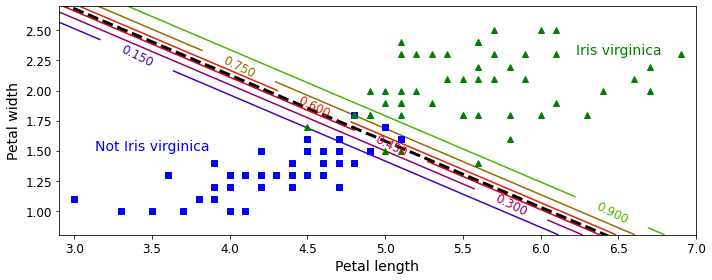

### 여러 클래스에 대한 분류 모형

반응변수 $Y$가 $K$개의 클래스를 가질 때에도 확장 가능하다. $k=1, \cdots, K$에 대해

$$ \mathbb P (Y = k | X) = \frac{e^{\theta^{(k)}_0 + \theta^{(k)}_1 X_1 + \cdots + \theta^{(k)}_p X_p}}{\sum_{\ell=1}^{K}e^{\theta^{(\ell)}_0 + \theta^{(\ell)}_1 X_1 + \cdots + \theta^{(\ell)}_p X_p}} $$

(각 클래스에 대한 총 $K$개의 식이 생성되지만, 실제로는 이 중 $K-1$개의 식이면 충분하다.)

모수들은 각 클래스 $k$에 대해 $\theta^{(k)}_0, \theta^{(k)}_1, \cdots, \theta^{(k)}_p$의 총 $1+p$개가 존재한다.

* 따라서 전체 모수의 수는 $(K - 1) \times (1 + p)$개가 존재한다.

이를 multinomial regression 혹은 softmax regression이라고 부르기도 한다.

(여러 클래스를 가지는 경우, regression외에도 다음에 살펴볼 discriminant analysis를 사용하는 방법도 있다.)

### 비용 함수 - cross entropy

Multi-class classification 문제의 비용 함수로서 cross entropy가 많이 사용된다.  

Cross entropy는 원래 정보 이론에서 사용되는 개념으로 두 확률 분포가 얼마나 비슷한지를 측정하는데 이용할 수 있다.

여기서는 $y_i$로 표현되는 관찰한 실증 분포와 모수로 표현되는 확률 분포 ($p_i^{(k)}$로 표현됨)를 비슷하게 적합하는 개념으로 사용된다.  

Cross entropy를 작을수록 두 분포가 비슷하다고 볼 수 있다.

$K$개의 클래스가 있다고 하자. 다시 말해, $ y_i \in \{ 1, \cdots, K \}$.

편의를 위해 $p_{i}^{(k)}$를 다음으로 정의하자.

$$ p_{i}^{(k)} =  P(y_i = k | x_i, \Theta ) = \frac{\exp(\theta^{(k)} \cdot x_i)}{\sum_{\ell=1}^{K} \exp(\theta^{(\ell)} \cdot x_i)} $$

여기서

$$\Theta = \begin{bmatrix} \theta^{(1)} & \theta^{(2)} & \cdots & \theta^{(K)} \end{bmatrix}$$

이고,

$$ \theta^{(k)} = \begin{bmatrix} \theta^{(k)}_0 & \theta^{(k)}_1 & \cdots & \theta^{(k)}_p \end{bmatrix}^{\top} $$

이다.

Cross entropy는 다음 식으로 정의한다.

$$ J(\Theta) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{\ell = 1}^{K} y_i^{(\ell)} \log p_{i}^{(\ell)} $$

이며, 여기서

$$ y_i^{(\ell)} = \mathbb {I}_{\{ y_i=\ell \}}. $$

### Gradient for softmax

소프트맥스 회귀의 경우도 그레디언트 벡터를 구할 수 있다.


위에서 살펴본 비용함수 $J$의 $\theta^{(k)}$에 대한 그레디언트 벡터는 다음으로 계산된다.

$$ \nabla_{\theta^{(k)}} J (\Theta) = \begin{bmatrix} \frac{\partial J(\Theta)}{\partial \theta_0^{(k)}} \\ \frac{\partial J(\Theta)}{\partial \theta_1^{(k)}} \\ \vdots \\ \frac{\partial J(\Theta)}{\partial \theta_p^{(k)}}  \end{bmatrix} = \frac{1}{N} \sum_{i=1}^{N} ( p_i^{(k)} - y_i^{(k)} ) x_i .$$

위 식을 유도하기 위해

\begin{align*}
\frac{\partial J(\Theta)}{\partial \theta_j^{(k)}}  &= -\frac{1}{N} \sum_{i=1}^{N} \sum_{\ell = 1}^{K} \frac{\partial}{\partial \theta_j^{(k)}}  y_i^{(\ell)} \log p_{(i)}^{(\ell)} \\
&= -\frac{1}{N} \sum_{i=1}^{N} \sum_{\ell = 1}^{K} y_i^{(\ell)} \frac{\partial \log p^{(\ell)}_i }{\partial p^{(\ell)}_i}  \frac{\partial p^{(\ell)}_i}{\partial a^{(k)}} \frac{\partial a^{(k)}}{\partial \theta_{j}^{(k)}}
\end{align*}

여기서

$$ a^{(k)} = \theta^{(k)} \cdot x_i $$ 

이고

$$ \frac{{\partial a^{(k)}}}{\partial \theta_{j}^{(k)}} = x_{ij}. $$

따라서

$$\frac{\partial J(\Theta)}{\partial \theta_j^{(k)}} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{\ell = 1}^{K} \frac{y^{(\ell)}_i}{p^{(\ell)}_i}  \frac{\partial p^{(\ell)}_i}{\partial a^{(k)}}  x_{ij}.$$

또한, 만약 $\ell = k$ 이면,
$$ \frac{\partial p^{(\ell)}_i}{\partial a^{(k)}} = \frac{\partial p^{(\ell)}_i}{\partial a^{(\ell)}} = \frac{\partial}{\partial a^{(\ell)}} \frac{\exp(a^{(\ell)})}{\sum_{m=1}^{K} \exp(a^{(m)})} = \frac{\exp(a^{(\ell)})\sum_{m=1}^{K} \exp(a^{(m)}) -  \exp(a^{(\ell)}) \exp(a^{(\ell)})}{ (\sum_{m=1}^{K} \exp(a^{(m)}) )^2 } = p^{(\ell)}_i \left( 1 - p^{(\ell)}_i \right) $$
이고, 만약 $\ell \neq k$ 이면
$$ \frac{\partial p^{(\ell)}_i}{\partial a^{(k)}} =  - \frac{ \exp(a^{(\ell)}) \exp(a^{(k)})}{ (\sum_{m=1}^{K} \exp(a^{(m)}) )^2 } = -  p^{(k)}_i p^{(\ell)}_i$$
이다.

그러므로,
\begin{align*}
\frac{\partial J(\Theta)}{\partial \theta_j^{(k)}} &= -\frac{1}{N} \sum_{i=1}^{N} \left( y_i^{(k)} (1 - p_i^{(k)} )  - \sum_{\ell \neq k} p_i^{(k)} y_i^{(\ell)} \right) x_{ij} \\
&=  -\frac{1}{N} \sum_{i=1}^{N} \left(y_i^{(k)} - p_i^{(k)} \left(y_i^{(k)}  + \sum_{\ell \neq k} y_i^{(\ell)}\right) \right) x_{ij}  \\
& = \frac{1}{N} \sum_{i=1}^N (p_i^{(k)} - y_i^{(k)} ) x_{ij}.
\end{align*}
이다.

위 식에서 $p_i^{(k)}$가 $\theta^{(k)}$에 대한 함수이며, $x_{ij}$와 $y_i^{(k)}$는 관찰값들이다.

모든 클래스 $k$들에 대하여도 위와 같은 그레디언트 벡터를 유도하여 사용한다.

### 두 개의 feature 변수와 3 개의 class

두 개의 입력 변수인 petal length, petal width로 3가지 서로 다른 붓꽃 품종을 예측하는 모형을 고려해 보자.

In [28]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [29]:
pd.DataFrame(np.c_[X, y], columns=("petal length", "petal_width", "target"))

petal length  petal_width  target
0             1.4          0.2     0.0
1             1.4          0.2     0.0
2             1.3          0.2     0.0
3             1.5          0.2     0.0
4             1.4          0.2     0.0
..            ...          ...     ...
145           5.2          2.3     2.0
146           5.0          1.9     2.0
147           5.2          2.0     2.0
148           5.4          2.3     2.0
149           5.1          1.8     2.0

[150 rows x 3 columns]

마찬가지로 ```sklearn.linear_model.LogisticRegression```를 이용한다.

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver="lbfgs")
softmax_reg

LogisticRegression(multi_class='multinomial')

In [32]:
softmax_reg.fit(X, y)

LogisticRegression(multi_class='multinomial')

In [33]:
softmax_reg.intercept_, softmax_reg.coef_

(array([ 11.12767979,   3.22717485, -14.35485463]),
 array([[-2.74866104, -1.16890756],
        [ 0.08356447, -0.90803047],
        [ 2.66509657,  2.07693804]]))

In [34]:
# 인자 : {array-like, sparse matrix} of shape (n_samples, n_features)
softmax_reg.predict([[5, 2]]) # petal length 5, petal width 2

array([2])

In [35]:
softmax_reg.predict_proba([[5, 2]])

array([[2.43559894e-04, 2.14859516e-01, 7.84896924e-01]])

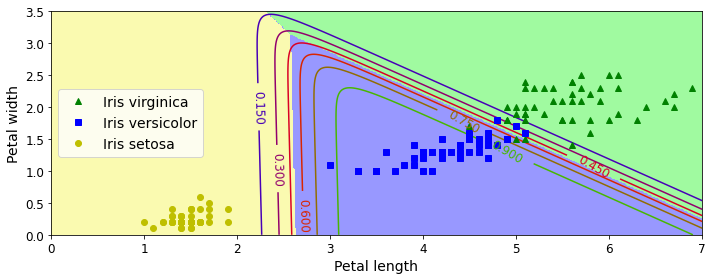

### with sepal length and sepal width

In [36]:
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression()

In [37]:
logreg.fit(X, Y)

LogisticRegression()

In [38]:
logreg.intercept_, logreg.coef_

(array([ 7.91322129,  1.84504714, -9.75826843]),
 array([[-2.70890249,  2.32402378],
        [ 0.61273259, -1.57058803],
        [ 2.0961699 , -0.75343574]]))

입력 변수에 대한 Meshgrid를 생성하여, 각 meshpoint에 대해 class를 예측해 보자.

Meshgrid의 모든 point에 대해 class prediction을 하기 위해, ```predict``` 메소드의 인자로 ```np.c_[xx.ravel(), yy.ravel()]```를 대입한 후, 결과를 meshgrid 형태로 ```reshape``` 하였다.

* ```ravel()```로 2차원 array를 1차원으로 flat할 수 있다.

```for``` loop를 돌려 계산할 수도 있지만, 아래의 방법이 더 빠르다.

In [39]:
x_min, x_max = 3.5, 8.5
y_min, y_max = 1.5, 5
h = 0.01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])   # raval : Return a contiguous flattened array.

Z = Z.reshape(xx.shape)
pd.DataFrame(Z)

0    1    2    3    4    5    6    7    8    9    ...  490  491  492  \
0      0    0    0    0    0    0    0    0    0    1  ...    2    2    2   
1      0    0    0    0    0    0    0    0    0    0  ...    2    2    2   
2      0    0    0    0    0    0    0    0    0    0  ...    2    2    2   
3      0    0    0    0    0    0    0    0    0    0  ...    2    2    2   
4      0    0    0    0    0    0    0    0    0    0  ...    2    2    2   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
345    0    0    0    0    0    0    0    0    0    0  ...    2    2    2   
346    0    0    0    0    0    0    0    0    0    0  ...    2    2    2   
347    0    0    0    0    0    0    0    0    0    0  ...    2    2    2   
348    0    0    0    0    0    0    0    0    0    0  ...    2    2    2   
349    0    0    0    0    0    0    0    0    0    0  ...    2    2    2   

     493  494  495  496  497  498  499  
0      2    2    2    2    2    2    2  
1      2    2    2    2    2    2    2  
2      2    2    2    2    2    2    2  
3      2    2    2    2    2    2    2  
4      2    2    2    2    2    2    2  
..   ...  ...  ...  ...  ...  ...  ...  
345    2    2    2    2    2    2    2  
346    2    2    2    2    2    2    2  
347    2    2    2    2    2    2    2  
348    2    2    2    2    2    2    2  
349    2    2    2    2    2    2    2  

[350 rows x 500 columns]

아래 코드에서 ```pcolormesh```로 컬러맵을 작성하였다.  

Scatter plot은 훈련에 사용한 관찰값들이다.

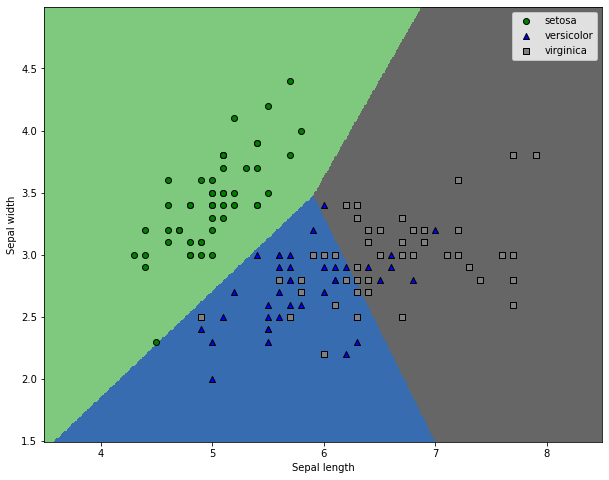

In [40]:
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Accent)

plt.scatter(X[Y==0, 0], X[Y==0, 1], edgecolors="k", marker="o", color="green", label='setosa')
plt.scatter(X[Y==1, 0], X[Y==1, 1], edgecolors="k", marker="^", color="blue", label='versicolor')
plt.scatter(X[Y==2, 0], X[Y==2, 1], edgecolors="k", marker="s", color="grey", label='virginica')

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.legend()

plt.show()

## Linear discriminant analysis

이전의 regression 방법은 $\mathbb P (Y=k | X=x)$의 확률을 계산하는 것이었다.

Linear distcriminat analysis에서는 주어진 $Y$에 대해 $X$의 분포를 추정한다.

만약 $X$의 분포가 정규분포라고 하면, 이 방법은 logistic regression과 매우 흡사하다.

다음의 상황에서 linear discriminant analysis가 유용하게 사용될 수 있다.

* 클래스들이 잘 분리되어 있을 때, logistic regression의 모수 추정은 불안정한 경우가 많다. 이 경우 LDA가 더 좋다.

* 데이터의 개수가 상대적으로 작고, $X$의 분포가 정규분포와 흡사할 때, LDA가 logistic regression 보다 잘 작동하는 경우가 많다.

* 2개 이상의 클래스가 있을 때, LDA는 유용하게 사용될 수 있다.

LDA는 Bayes 정리를 기반으로 한다.

$Y$가 $K$개의 클래스를 가질 수 있다고 하자.

$\pi_k$를 임의로 선택한 관찰 결과가 $k$에 속하게 될, 사전 확률 (prior probability)이라고 하자.

* 즉, 이 확률은 $X$에 대한 정보 없이 결정된 확률이다.

$Y$가 $k$의 클래스에 속할 때, $X$의 확률밀도함수를 다음과 같이 정의하자.

$$ f_k(X) = \mathbb P (X=x | Y=k) $$

Bayes 정리에 따르면,

$$ \mathbb P(Y = k | X = x) = \frac{\pi_k f_k(x)}{\sum_{l=1}^{K} \pi_l f_l(x)} $$

한편, $p_k(x) = \mathbb P(Y = k | X = x)$라고 하겠다. 이를 사후 확률, posterior probability 라고도 한다.

이전에는 $p_k$를 직접 계산하는 것이 목표였다면, LDA에서는 $\pi$들과 $f$들을 추정하여, $p_k$를 추정한다.

* $\pi_k$는 추정이 쉽다.

* 반면, $f_k$의 추정은 더 어려운 문제이다.



### Linear Discriminant Analysis when $p = 1$

$Y$가 $k$의 클래스에 속할 때, $X$의 확률밀도함수 $f_k$를 정규분포로 가정해 보자.

$$ f_k(x) = \frac{1}{\sqrt{2 \pi} \sigma_k} e^{ -\frac{1}{2} \left( \frac{x - \mu_k}{\sigma_k} \right)^2 } $$

여기서 $\mu_k$는 평균, $\sigma_k^2$은 분산이다.

편의를 위해 $\sigma_k = \sigma$로 가정하겠다.

Bayes 정리 식에 따르면 $p_k(x) = \mathbb P (Y = k | X = x)$에 대한 다음의 다소 복잡한 식을 얻는다.

$$ p_k (x) = \frac{\pi_k \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{1}{2}\left( \frac{x - \mu_k}{\sigma} \right)^2}}{\sum_{l=1}^{K} \pi_l \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{1}{2}\left( \frac{x - \mu_l}{\sigma} \right)^2}} $$

$X=x$에서의 분류를 위하여 어떤 $p_k (x)$가 가장 큰지 알아봐야 한다.

위 식에 로그를 취하고, 불필요한 항을 제거하면, discriminant score라 불리우는 다음의 값을 얻는다.

$$ \delta_k (x) = x \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} + \log (\pi_k) $$

$p_k$ 중 어느 것이 가장 큰지를 찾는 것과 $\delta_k$ 중 어느 것이 가장 큰지 찾는 문제는 동치이다.

$\delta_k$는 $x$의 선형 함수임을 주목하라.

예들들어 만약 $K=2$이고, $\pi_1 = \pi_2 = 0.5$이면 결정 경계는 다음과 같다.

$$ x = \frac{\mu_1 + \mu_2}{2} $$

실제로는 모수의 값들을 알지 못하기 때문에 다음으로 추정하여 사용한다.

\begin{align*}
\hat \pi_k &= \frac{n_k}{n} \\
\hat \mu_k &= \frac{1}{n_k} \sum_{i:y_i=k} x_i \\
\hat \sigma^2 &= \frac{1}{n-K} \sum_{k=1}^{K} \sum_{i:y_i=k}(x_i - \hat \mu_k)^2
\end{align*}


### Linear Discriminant Analysis when $p > 1$

다변량 정규분포를 이용하여 $p>1$인 경우로 확장가능하다.

다변량 정규분포의 확률밀도함수는 다음으로 정의된다.

$$ f(X) = \frac{1}{(2\pi)^{p/2} |\Sigma|^{1/2}} \exp \left(-\frac{1}{2} (x - \mu)^{\top} \Sigma^{-1} (x - \mu) \right) $$

여기서 $\mu$는 평균으로 이루어진 벡터, $\Sigma$는 공분산 행렬, $|\Sigma|$는 행렬식 (determinant)을 의미한다. 

LDA에서는 $k$번째 클래스에 대응되는 $X$의 분포가 $N(\mu_k, \Sigma)$를 따른다고 가정한다. $X$의 크기에 따라 $\mu_k$ 또한 벡터로 표현됨을 주목하라.

이를 이용하여 discriminant score를 계산하면,

$$ \delta_k (x) = x^{\top} \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^{\top} \Sigma^{-1} \mu_k + \log \pi_k $$

이며, 따라서, $X=x$의 관찰값에 대해 $\delta_k$의 값이 가장 큰 클래스를 선정한다.

비록 $\delta_k$는 복잡해 보여도 $x$들에 대한 선형함수이다.

아래는 $\pi_1 = \pi_2 = \pi_3 = 1/3$에 대한 LDA 경계선의 예제이다.

점선은 Bayes decision boundary 이고, 실선이 정규분포를 바탕으로 한 LDA boundary이다. 

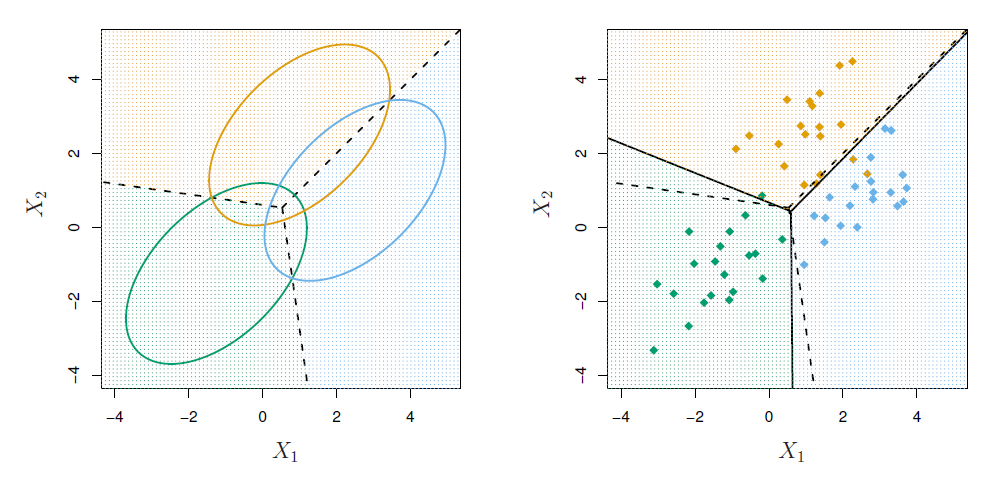

데이터로부터 $\hat \delta_k (x)$가 추정되면, 이 추정치를 각 클래스에 대한 확률 추정에 사용할 수 있다.

$$ \hat{\mathbb P} (Y=k | X=x) = \frac{e^{\hat \delta_k (x)}}{\sum_{l = 1}^{K} e^{\hat \delta_{l}(x)}} $$

In [41]:
from sklearn import datasets
import pandas as pd
raw_wine = datasets.load_wine()

In [42]:
raw_wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [43]:
raw_wine["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [44]:
pd.DataFrame(raw_wine["data"], columns = raw_wine["feature_names"])

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

alcohol과 malic_acid를 이용하여 와인의 종류를 예측하는 예제를 진행해 보자.

In [45]:
X, y  = raw_wine.data[:,:2], raw_wine.target

In [46]:
pd.DataFrame(np.c_[X, y],  columns = ["alcohol", "malic_acid", "y"])

alcohol  malic_acid    y
0      14.23        1.71  0.0
1      13.20        1.78  0.0
2      13.16        2.36  0.0
3      14.37        1.95  0.0
4      13.24        2.59  0.0
..       ...         ...  ...
173    13.71        5.65  2.0
174    13.40        3.91  2.0
175    13.27        4.28  2.0
176    13.17        2.59  2.0
177    14.13        4.10  2.0

[178 rows x 3 columns]

앞의 예제에서는 데이터의 전부를 모형 훈련에 사용하였지만, 이 예제에서는 훈련 데이터와 테스트 데이터를 분할하여 사용한다.  

```sklearn.model_selection.train_test_split```을 이용하면, 데이터를 쉽게 분할할 수 있다.

In [47]:
# 트레이닝 테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y)

In [48]:
pd.DataFrame(np.c_[X_tn, y_tn],  columns = ["alcohol", "malic_acid", "y"])

alcohol  malic_acid    y
0      13.48        1.67  2.0
1      14.16        2.51  2.0
2      12.08        1.13  1.0
3      13.36        2.56  2.0
4      14.22        1.70  0.0
..       ...         ...  ...
128    11.76        2.68  1.0
129    13.68        1.83  0.0
130    13.51        1.80  0.0
131    12.22        1.29  1.0
132    13.24        3.98  0.0

[133 rows x 3 columns]

In [49]:
pd.DataFrame(np.c_[X_te, y_te],  columns = ["alcohol", "malic_acid", "y"])

alcohol  malic_acid    y
0     13.58        1.66  0.0
1     12.16        1.61  1.0
2     13.34        0.94  1.0
3     12.96        3.45  2.0
4     13.11        1.90  2.0
5     12.72        1.81  1.0
6     12.45        3.03  2.0
7     11.61        1.35  1.0
8     13.05        1.77  0.0
9     13.05        5.80  1.0
10    12.58        1.29  2.0
11    12.29        2.83  1.0
12    12.70        3.87  1.0
13    13.05        1.73  0.0
14    12.08        1.33  1.0
15    12.99        1.67  1.0
16    14.13        4.10  2.0
17    14.10        2.16  0.0
18    13.77        1.90  0.0
19    12.93        3.80  0.0
20    12.51        1.73  1.0
21    13.20        1.78  0.0
22    13.49        1.66  1.0
23    12.84        2.96  2.0
24    13.87        1.90  0.0
25    11.66        1.88  1.0
26    11.65        1.67  1.0
27    13.27        4.28  2.0
28    13.78        2.76  2.0
29    12.00        3.43  1.0
30    12.72        1.75  1.0
31    13.29        1.97  0.0
32    12.93        2.81  2.0
33    12.33        0.99  1.0
34    12.42        4.43  1.0
35    11.81        2.12  1.0
36    12.67        0.98  1.0
37    13.05        1.65  0.0
38    14.22        3.99  0.0
39    13.84        4.12  2.0
40    12.29        1.61  1.0
41    14.38        1.87  0.0
42    14.02        1.68  0.0
43    12.25        1.73  1.0
44    13.16        3.57  2.0

모형을 훈련할 때, 훈련 데이터를 표준화하여 훈련하면 성능 향상을 기대할 수 있다.  
$X$의 값들만 표준화하면 된다.

```sklearn.preprocessing.StandardScaler```를 이용하면 쉽게 표준화할 수 있다.  

전체 ```X```를 StandardScaler에 fitting 한 후, transform method를 훈련 데이터와 테스트 데이터에 적용한다.

In [50]:
# 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [51]:
X_tn_std = std_scale.fit(X).transform(X_tn)
X_te_std = std_scale.fit(X).transform(X_te)

### ```sklearn.discriminant_analysis.LinearDiscriminantAnalysis```

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

훈련 데이터만을 이용하여 ```fit```을 진행한다.

In [53]:
lda.fit(X_tn, y_tn)

LinearDiscriminantAnalysis()

앞에서 했던 것처럼 meshigrid를 생성하여 gird의 모든 point에 대해 예측을 진행한다.

In [54]:
xx1, xx2 = np.meshgrid(np.linspace(11, 15, 1000),
                         np.linspace(0, 6, 1000))


pd.DataFrame(xx1)

0          1          2          3          4         5          6    \
0    11.0  11.004004  11.008008  11.012012  11.016016  11.02002  11.024024   
1    11.0  11.004004  11.008008  11.012012  11.016016  11.02002  11.024024   
2    11.0  11.004004  11.008008  11.012012  11.016016  11.02002  11.024024   
3    11.0  11.004004  11.008008  11.012012  11.016016  11.02002  11.024024   
4    11.0  11.004004  11.008008  11.012012  11.016016  11.02002  11.024024   
..    ...        ...        ...        ...        ...       ...        ...   
995  11.0  11.004004  11.008008  11.012012  11.016016  11.02002  11.024024   
996  11.0  11.004004  11.008008  11.012012  11.016016  11.02002  11.024024   
997  11.0  11.004004  11.008008  11.012012  11.016016  11.02002  11.024024   
998  11.0  11.004004  11.008008  11.012012  11.016016  11.02002  11.024024   
999  11.0  11.004004  11.008008  11.012012  11.016016  11.02002  11.024024   

           7          8          9    ...        990        991        992  \
0    11.028028  11.032032  11.036036  ...  14.963964  14.967968  14.971972   
1    11.028028  11.032032  11.036036  ...  14.963964  14.967968  14.971972   
2    11.028028  11.032032  11.036036  ...  14.963964  14.967968  14.971972   
3    11.028028  11.032032  11.036036  ...  14.963964  14.967968  14.971972   
4    11.028028  11.032032  11.036036  ...  14.963964  14.967968  14.971972   
..         ...        ...        ...  ...        ...        ...        ...   
995  11.028028  11.032032  11.036036  ...  14.963964  14.967968  14.971972   
996  11.028028  11.032032  11.036036  ...  14.963964  14.967968  14.971972   
997  11.028028  11.032032  11.036036  ...  14.963964  14.967968  14.971972   
998  11.028028  11.032032  11.036036  ...  14.963964  14.967968  14.971972   
999  11.028028  11.032032  11.036036  ...  14.963964  14.967968  14.971972   

           993       994        995        996        997        998   999  
0    14.975976  14.97998  14.983984  14.987988  14.991992  14.995996  15.0  
1    14.975976  14.97998  14.983984  14.987988  14.991992  14.995996  15.0  
2    14.975976  14.97998  14.983984  14.987988  14.991992  14.995996  15.0  
3    14.975976  14.97998  14.983984  14.987988  14.991992  14.995996  15.0  
4    14.975976  14.97998  14.983984  14.987988  14.991992  14.995996  15.0  
..         ...       ...        ...        ...        ...        ...   ...  
995  14.975976  14.97998  14.983984  14.987988  14.991992  14.995996  15.0  
996  14.975976  14.97998  14.983984  14.987988  14.991992  14.995996  15.0  
997  14.975976  14.97998  14.983984  14.987988  14.991992  14.995996  15.0  
998  14.975976  14.97998  14.983984  14.987988  14.991992  14.995996  15.0  
999  14.975976  14.97998  14.983984  14.987988  14.991992  14.995996  15.0  

[1000 rows x 1000 columns]

In [55]:
np.c_[xx1.ravel(), xx2.ravel()]

array([[11.        ,  0.        ],
       [11.004004  ,  0.        ],
       [11.00800801,  0.        ],
       ...,
       [14.99199199,  6.        ],
       [14.995996  ,  6.        ],
       [15.        ,  6.        ]])

In [56]:
# xx1과 xx2의 값을 이용하여 세 개의 class에 대해 각 class 별 확률 예측
Z = lda.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])   # ravel : Return a contiguous flattened array
Z

array([[1.74518010e-06, 9.99993073e-01, 5.18132108e-06],
       [1.78903423e-06, 9.99992949e-01, 5.26186095e-06],
       [1.83399035e-06, 9.99992822e-01, 5.34365275e-06],
       ...,
       [1.49363162e-01, 1.50426893e-07, 8.50636688e-01],
       [1.50560575e-01, 1.47915879e-07, 8.49439277e-01],
       [1.51765874e-01, 1.45445139e-07, 8.48233980e-01]])

아래 방법에서는 각 행 별로 확률의 값을 최대화 하는 열의 index를 찾는다.  
그 index는 곧 class를 의미한다.

In [57]:
np.argmax(Z, axis=1)

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [58]:
clss = np.argmax(Z, axis=1).reshape(xx1.shape)
clss

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int64)

물론 ```predict```로 찾는 것과 동일하다.

In [59]:
clss = lda.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
clss

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

```pcolormesh```를 통해 LDA의 경계선을 표현해 보자.  
산점도는 train data를 의미한다.

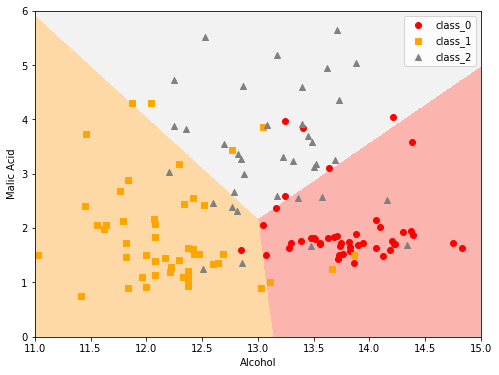

In [60]:
import matplotlib.pyplot as plt
#from matplotlib import colors

plt.figure(figsize=(8,6))

plt.pcolormesh(xx1, xx2, clss, cmap="Pastel1")  #Create a pseudocolor plot with a non-regular rectangular grid.

df = pd.DataFrame(X_tn, columns = raw_wine["feature_names"][:2])
df['target'] = y_tn
markers = ['o', 's', '^']
colors = ["red", "orange", "grey"]

for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    class_i = raw_wine.target_names[i]
    plt.scatter(X_i[["alcohol"]], X_i[["malic_acid"]], marker = mark, label = class_i, color = colors[i])
    
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
    
    
plt.legend()    
plt.show()

아래는 산점도만 test set으로 바꾸었다.

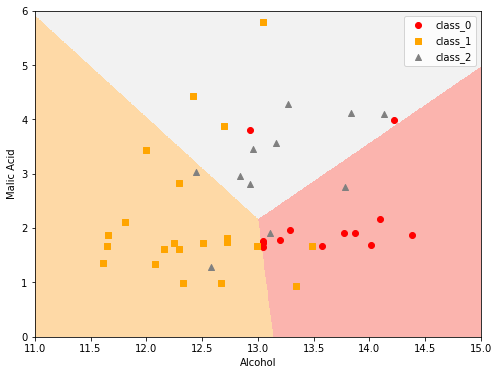

In [61]:
# Using test set
plt.figure(figsize=(8,6))

plt.pcolormesh(xx1, xx2, clss, cmap="Pastel1")  #Create a pseudocolor plot with a non-regular rectangular grid.

df = pd.DataFrame(X_te, columns = raw_wine["feature_names"][:2])
df['target'] = y_te
markers = ['o', 's', '^']
colors = ["red", "orange", "grey"]


for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    class_i = raw_wine.target_names[i]
    plt.scatter(X_i[["alcohol"]], X_i[["malic_acid"]], marker = mark, label = class_i, color = colors[i])
    
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
    
plt.legend()    
plt.show()

## Confusion matrix


|            |          | True  status   |                |
|------------|----------|----------------|----------------|
|            |          | Positive (non-null)       | Negative (null)      |
| Prediction | Positive (non-null) | True Positive  | False Positive |
|            | Negative (null) | False Negative | True Negative  |
|            |          |                |                |


Types of errors

* False positive rate : 실제 negative 중 positive로 잘못 예상된 False positive에 해당하는 비율, FP/N
    * 통계학에서의 1종 오류율, $\alpha$, 귀무가설(null)이 사실이어도 기각될 확률
    * 1 - specificity
* False negative rate : 실제 positive 중 negative로 잘못 예상된 False negative에 해당하는 비율, TP/P
    * 통계학에서의 2종 오류율, $\beta$,  귀무가설(null)이 거짓이어도 기각하지 못할 확률
    * 1 - sensitivity

그 외의 용어들:

* 민감도, 재현율, Sensitivity, Recall (True positive rate), Power : 실제 postive 중 올바르게 positive로 예측된 비율, TP/P
  * 1 - FNR
* 특이도, Specificity (True negative rate) : 실제 negative 중 올바르게 negative로 예측된 비율, TN/N
  * 1 - FPR
* 정밀도, Precision (Positive predictive rate) : 양성 예측 중 실제 양성의 비율, TP / P*
* Negative predictive rate : 음성 예측 중 실제 음성의 비율, TN / N*
* 정확도, Accuracy : 전체 데이터 중 정답으로 분류되는 비율
* 에러율, Error rate : 전체 데이터 중 오답으로 분류되는 비율

정밀도 (precision)와 민감도 (sensitivity)은 트레이드오프를 지닌다. 

정밀도를 올리면 민감도 (재현율)이 줄고, 민감도를 높이면 정밀도가 낮아지는 경향이 있다.

양성으로 판정되는 기준을 높이면 정밀도가 올라가나, 민감도 (재현율)은 떨어진다.

양성으로 판정되는 기준을 낮추면 재현율은 올라가나, 정밀도는 떨어진다.


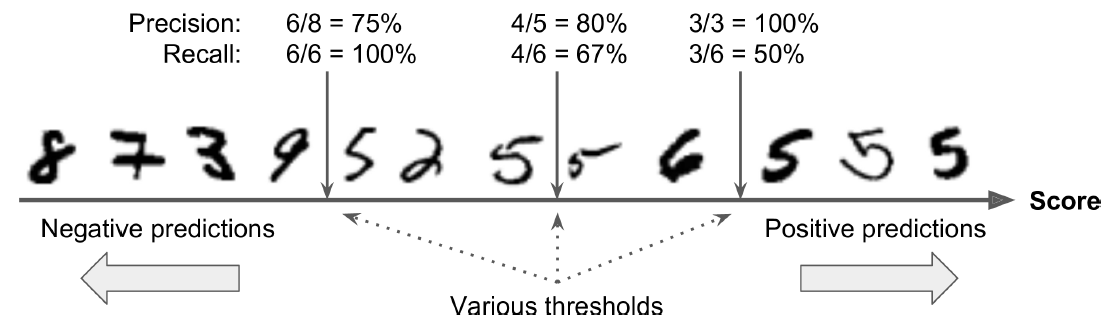

### ROC (receiver operating characteristic) curve

Classification threshold 에 따라 x-축에 FPR (False positive rate, 1 - specificity)을 놓고, y-축에 TPR (True positive rate, 민감도, 재현율)의 값을 놓고 비교하는 것

* $\mathbb P(Y = 1 | X = x) > \text{threshold}  \Rightarrow \hat Y =1 $

* FPR이 낮을수록, TPR이 높을수록 좋다.

(통계학적 용어로는 제1종 오류율과 검정력의 비교)

모형마다 ROC가 다르며, ROC 아래의 면적 (AUC)이 클 수록 좋은 분류기라고 할 수 있다.

한편, 아래 ROC 곡선에서 FPR은 낮으면서, 재현율은 높은 지점에 해당하는 적절한 threshold를 선택하는 것이 중요할 것이다.

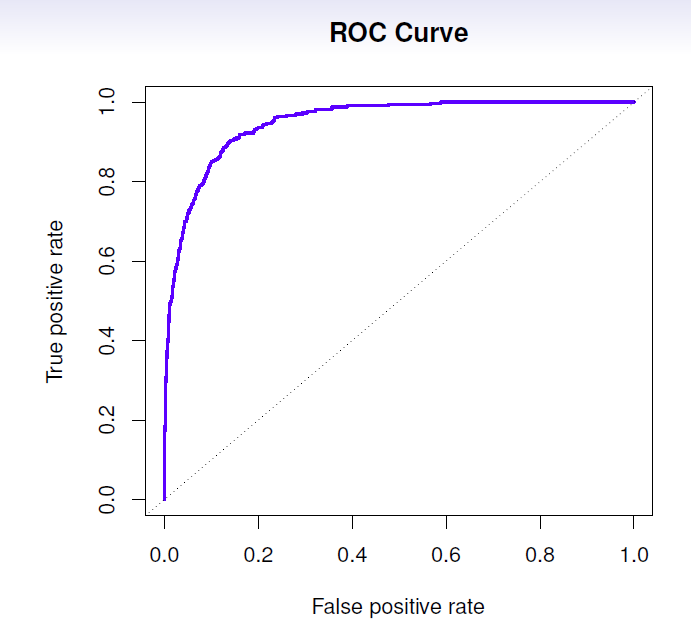

In [62]:
pred_by_LDA = lda.predict(X_te)
print(pred_by_LDA)

[0 1 0 2 0 1 1 1 0 2 1 1 2 0 1 1 2 0 0 2 1 0 0 2 0 1 1 2 0 1 1 0 2 1 2 1 1
 0 2 2 1 0 0 1 2]


In [63]:
print(y_te)

[0 1 1 2 2 1 2 1 0 1 2 1 1 0 1 1 2 0 0 0 1 0 1 2 0 1 1 2 2 1 1 0 2 1 1 1 1
 0 0 2 1 0 0 1 2]


[classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

$$ F_1 = 2 \frac{precision \times recall}{precision + recall} = \frac{TP}{ TP + 0.5 (FP + FN) }$$

In [64]:
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_by_LDA)
print(class_report)

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.89      0.76      0.82        21
           2       0.58      0.64      0.61        11

    accuracy                           0.76        45
   macro avg       0.74      0.75      0.74        45
weighted avg       0.77      0.76      0.76        45



In [65]:
# precision for 0 class
sum((y_te==0) & (pred_by_LDA==0)) / sum(pred_by_LDA==0)

0.7333333333333333

In [66]:
# precision for 1 class
sum((y_te==1) & (pred_by_LDA==1)) / sum(pred_by_LDA==1)

0.8888888888888888

In [67]:
# precision for 2 class
sum((y_te==2) & (pred_by_LDA==2)) / sum(pred_by_LDA==2)

0.5833333333333334

In [68]:
# recall for 0 class
sum((y_te==0) & (pred_by_LDA==0)) / sum(y_te==0)

0.8461538461538461

In [69]:
# recall for 1 class
sum((y_te==1) & (pred_by_LDA==1)) / sum(y_te==1)

0.7619047619047619

In [70]:
# recall for 1 class
sum((y_te==2) & (pred_by_LDA==2)) / sum(y_te==2)

0.6363636363636364

In [71]:
# accuracy
(sum((y_te==0) & (pred_by_LDA==0)) + sum((y_te==1) & (pred_by_LDA==1)) + sum((y_te==2) & (pred_by_LDA==2))) / len(y_te)

0.7555555555555555

## 다른 형태의 discriminant analysis

* $f_k(x)$가 Gaussian이며 $\Sigma_{k}$가 각 클래스 별로 다를 경우, quadratic discriminant analysis라고 한다.

* $f_k(x) = \prod_{j=1}^{p} f_{jk}(x_j)$, 즉, $x$들이 조건부 독립일 때, 이를 naive Bayes라고 한다.

* 그 외에, $f_k$를 어떻게 정의하느냐에 따라 다양한 discriminant analysis form이 존재할 수 있다.

### Quadratic discriminant analysis

$$ \delta_k(x) = -\frac{1}{2} (x - \mu_k)^{\top} \Sigma_{k}^{-1} (x - \mu_k) - \frac{1}{2}\log |\Sigma_k| + \log \pi_k $$

$k$에 따라 $\Sigma_{k}$가 다르기 때문에, quadratic 형태의 라인이 경계선으로 나타난다.

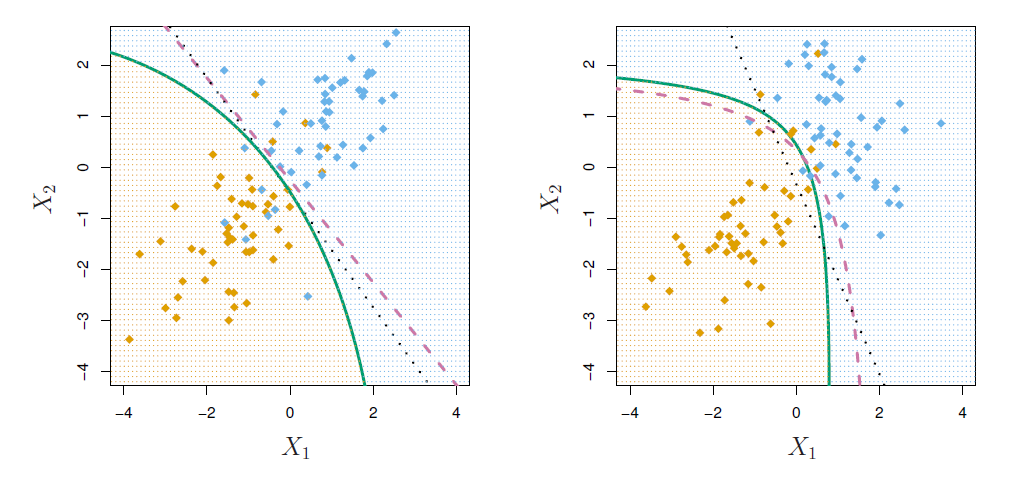

```sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis```를 이용하여 quadratic discriminant analysis를 진행해 보자.

In [72]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_tn, y_tn)

clss = qda.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

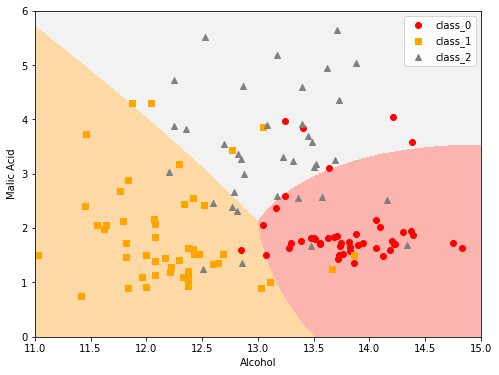

In [73]:
plt.figure(figsize=(8,6))

plt.pcolormesh(xx1, xx2, clss, cmap="Pastel1")  #Create a pseudocolor plot with a non-regular rectangular grid.

df = pd.DataFrame(X_tn, columns = raw_wine["feature_names"][:2])
df['target'] = y_tn
markers = ['o', 's', '^']
colors = ["red", "orange", "grey"]

for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    class_i = raw_wine.target_names[i]
    plt.scatter(X_i[["alcohol"]], X_i[["malic_acid"]], marker = mark, label = class_i, color = colors[i])
    
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
    
    
plt.legend()    
plt.show()

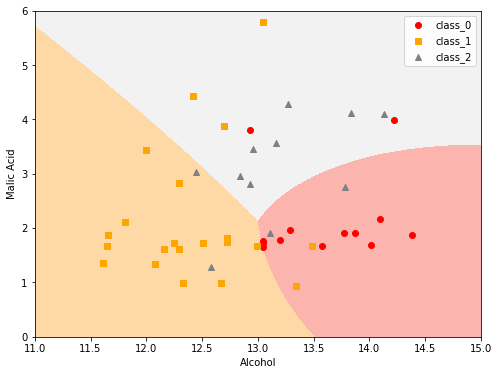

In [74]:
plt.figure(figsize=(8,6))

plt.pcolormesh(xx1, xx2, clss, cmap="Pastel1")  #Create a pseudocolor plot with a non-regular rectangular grid.

df = pd.DataFrame(X_te, columns = raw_wine["feature_names"][:2])
df['target'] = y_te
markers = ['o', 's', '^']
colors = ["red", "orange", "grey"]

for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    class_i = raw_wine.target_names[i]
    plt.scatter(X_i[["alcohol"]], X_i[["malic_acid"]], marker = mark, label = class_i, color = colors[i])
    
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
    
    
plt.legend()    
plt.show()

In [75]:
class_report = classification_report(y_te, qda.predict(X_te))
print(class_report)

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.89      0.76      0.82        21
           2       0.58      0.64      0.61        11

    accuracy                           0.76        45
   macro avg       0.74      0.75      0.74        45
weighted avg       0.77      0.76      0.76        45



### Naive Bayes

$X$들이 모두 독립이라고 가정한 경우를 Naive Bayes라고 부른다.

$p$가 클 경우 유용하다.

Gaussian naive Bayes에서는 $\Sigma_k$가 대각 행렬이 된다. 따라서

$$ \delta_k(x) \propto \log \left[ \pi_k \prod_{j=1}^{p} f_{kj}(x_j) \right] = -\frac{1}{2} \sum_{j=1}^{p} \frac{(x_j - \mu_{kj})^2}{\sigma_{kj}^2} + \log \pi_k $$

이 방법은 $x$가 질적 변수, 양적 변수가 섞여 있을 때에도 적용할 수 있다.

만약 $X_j$가 질적 변수라면, $f_{kj}(x_j)$ 대신 prabability mass function을 적용한다.

Naive Bayes는 강한 조건을 가정하지만, 비교적 좋은 분류 결과를 얻는 경향이 있다고 한다.

In [76]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_tn, y_tn)

GaussianNB()

In [77]:
pred_by_gnb = gnb.predict(X_te)
print(pred_by_gnb)

[0 1 0 2 0 1 1 1 0 2 1 1 2 0 1 1 2 0 0 2 1 0 0 2 0 1 1 2 0 1 1 0 2 1 2 1 1
 0 2 2 1 0 0 1 2]


In [78]:
class_report_gnb = classification_report(y_te, pred_by_gnb)
print(class_report_gnb)

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.89      0.76      0.82        21
           2       0.58      0.64      0.61        11

    accuracy                           0.76        45
   macro avg       0.74      0.75      0.74        45
weighted avg       0.77      0.76      0.76        45



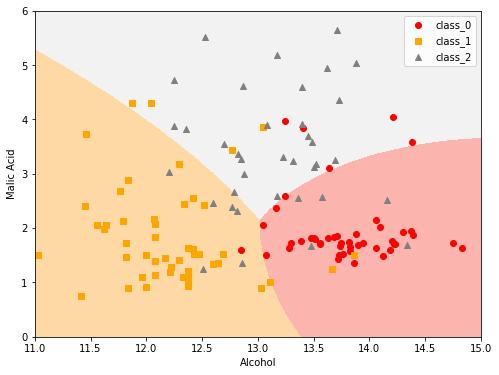

In [79]:
Z = gnb.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])   

clss = gnb.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)


plt.figure(figsize=(8,6))

plt.pcolormesh(xx1, xx2, clss, cmap="Pastel1")  

df = pd.DataFrame(X_tn, columns = raw_wine["feature_names"][:2])
df['target'] = y_tn
markers = ['o', 's', '^']
colors = ["red", "orange", "grey"]


for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    class_i = raw_wine.target_names[i]
    plt.scatter(X_i[["alcohol"]], X_i[["malic_acid"]], marker = mark, label = class_i, color = colors[i])

plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
    
plt.legend()    
plt.show()